# Non-Clifford CNOT-Dihedral Interleaved Randomized Benchmarking 
# of a CS gate

In [1]:
#Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

#Import Qiskit classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel, errors
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error, coherent_unitary_error
from qiskit.quantum_info.operators import Operator

#Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

#from examples import CS_utils

In [2]:
#Number of qubits
nQ = 2
#There are 3 qubits: Q0,Q1.
#Number of seeds (random sequences)
nseeds = 5
#Number of Cliffords in the sequence (start, stop, steps)
nCliffs = np.arange(1,200,20)
#2Q RB on Q0,Q2 and 1Q RB on Q1
rb_pattern = [[0,1]]
# Non-Clifford RB
group_gates = 'CNOT-Dihedral'

### Interleaved RB with a CS gate 

Defining a CS gate using an operator.

In [3]:
rb_opts = {}
rb_opts['length_vector'] = nCliffs
rb_opts['nseeds'] = nseeds
rb_opts['rb_pattern'] = rb_pattern
rb_opts['group_gates'] = group_gates
rb_opts['align_cliffs'] = True

CS01 = rb.dihedral.CNOTDihedral(2)
CS01.phase(1, 0)
CS01.phase(1, 1)
CS01.cnot(0, 1)
CS01.phase(7, 1)
CS01.cnot(0, 1)

cs = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1j]])

rb_opts['interleaved_gates'] = [(CS01, [('cs', 0, 1)])]

rb_cnotdihedral_Z_circs, xdata, rb_cnotdihedral_X_circs, rb_cnotdihedral_interleaved_Z_circs, \
rb_cnotdihedral_interleaved_X_circs = rb.randomized_benchmarking_seq(**rb_opts)

In [4]:
print (rb_cnotdihedral_Z_circs[0][0])

         ┌────────────┐┌───┐┌────────────┐ ░  ░ ┌───────────┐┌───┐ ┌──────────┐»
qr_0: |0>┤ U1(5.4978) ├┤ X ├┤ U1(2.3562) ├─░──░─┤ U1(3.927) ├┤ X ├─┤ U1(pi/4) ├»
         ├────────────┤└─┬─┘└────────────┘ ░  ░ └───────────┘└─┬─┘┌┴──────────┤»
qr_1: |0>┤ U1(2.3562) ├──■─────────────────░──░────────────────■──┤ U1(3.927) ├»
         └────────────┘                    ░  ░                   └───────────┘»
 cr_0: 0 ══════════════════════════════════════════════════════════════════════»
                                                                               »
 cr_1: 0 ══════════════════════════════════════════════════════════════════════»
                                                                               »
«      ┌─┐   
«qr_0: ┤M├───
«      └╥┘┌─┐
«qr_1: ─╫─┤M├
«       ║ └╥┘
«cr_0: ═╩══╬═
«          ║ 
«cr_1: ════╩═
«            


In [5]:
print (rb_cnotdihedral_interleaved_Z_circs[0][0])

         ┌────────────┐┌───┐┌────────────┐ ░ ┌──────────┐ ░  ░ ┌───┐»
qr_0: |0>┤ U1(5.4978) ├┤ X ├┤ U1(2.3562) ├─░─┤0         ├─░──░─┤ X ├»
         ├────────────┤└─┬─┘└────────────┘ ░ │  unitary │ ░  ░ └─┬─┘»
qr_1: |0>┤ U1(2.3562) ├──■─────────────────░─┤1         ├─░──░───■──»
         └────────────┘                    ░ └──────────┘ ░  ░      »
 cr_0: 0 ═══════════════════════════════════════════════════════════»
                                                                    »
 cr_1: 0 ═══════════════════════════════════════════════════════════»
                                                                    »
«      ┌────────────┐┌─┐
«qr_0: ┤ U1(4.7124) ├┤M├
«      └────┬─┬─────┘└╥┘
«qr_1: ─────┤M├───────╫─
«           └╥┘       ║ 
«cr_0: ══════╬════════╩═
«            ║          
«cr_1: ══════╩══════════
«                       


In [6]:
print (rb_cnotdihedral_X_circs[0][0])

         ┌───┐ ░ ┌────────────┐┌───┐┌────────────┐ ░  ░ ┌───────────┐┌───┐»
qr_0: |0>┤ H ├─░─┤ U1(5.4978) ├┤ X ├┤ U1(2.3562) ├─░──░─┤ U1(3.927) ├┤ X ├»
         ├───┤ ░ ├────────────┤└─┬─┘└────────────┘ ░  ░ └───────────┘└─┬─┘»
qr_1: |0>┤ H ├─░─┤ U1(2.3562) ├──■─────────────────░──░────────────────■──»
         └───┘ ░ └────────────┘                    ░  ░                   »
 cr_0: 0 ═════════════════════════════════════════════════════════════════»
                                                                          »
 cr_1: 0 ═════════════════════════════════════════════════════════════════»
                                                                          »
«       ┌──────────┐ ░ ┌───┐┌─┐   
«qr_0: ─┤ U1(pi/4) ├─░─┤ H ├┤M├───
«      ┌┴──────────┤ ░ ├───┤└╥┘┌─┐
«qr_1: ┤ U1(3.927) ├─░─┤ H ├─╫─┤M├
«      └───────────┘ ░ └───┘ ║ └╥┘
«cr_0: ══════════════════════╩══╬═
«                               ║ 
«cr_1: ═════════════════════════╩═
«                                 


In [7]:
print (rb_cnotdihedral_interleaved_X_circs[0][0])

         ┌───┐ ░ ┌────────────┐┌───┐┌────────────┐ ░ ┌──────────┐ ░  ░ ┌───┐»
qr_0: |0>┤ H ├─░─┤ U1(5.4978) ├┤ X ├┤ U1(2.3562) ├─░─┤0         ├─░──░─┤ X ├»
         ├───┤ ░ ├────────────┤└─┬─┘└────────────┘ ░ │  unitary │ ░  ░ └─┬─┘»
qr_1: |0>┤ H ├─░─┤ U1(2.3562) ├──■─────────────────░─┤1         ├─░──░───■──»
         └───┘ ░ └────────────┘                    ░ └──────────┘ ░  ░      »
 cr_0: 0 ═══════════════════════════════════════════════════════════════════»
                                                                            »
 cr_1: 0 ═══════════════════════════════════════════════════════════════════»
                                                                            »
«      ┌────────────┐  ░  ┌───┐┌─┐
«qr_0: ┤ U1(4.7124) ├──░──┤ H ├┤M├
«      └─────░──────┘┌───┐└┬─┬┘└╥┘
«qr_1: ──────░───────┤ H ├─┤M├──╫─
«            ░       └───┘ └╥┘  ║ 
«cr_0: ═════════════════════╬═══╩═
«                           ║     
«cr_1: ═════════════════════╩═════
«                 

### Add a coherent noise to the CS gate

In [8]:
### Add coherent unitary error to "cs" gate

def err_unitary(angle_err):
    err_unitary = np.zeros([2, 2], dtype=complex)
    for i in range(2):
        err_unitary[i, i] = np.cos(angle_err)
        err_unitary[i, (i+1) % 2] = np.sin(angle_err)
    err_unitary[0, 1] *= -1.0
    return (err_unitary)

err_unitary_cs = np.kron(err_unitary(0.025), err_unitary(0.025))
err_unitary_cx = np.kron(err_unitary(0.05), err_unitary(0.05))
err_unitary_u3 = err_unitary(0.002)

print ("err_unitary_u3:", err_unitary_u3)
print ("err_unitary_cs:", err_unitary_cs)
print ("err_unitary_cx:", err_unitary_cx)

cx_error = errors.coherent_unitary_error(err_unitary_cx)
cs_error = errors.coherent_unitary_error(err_unitary_cs)
u3_error = errors.coherent_unitary_error(err_unitary_u3)

noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(u3_error, 'u3')
noise_model.add_all_qubit_quantum_error(cx_error, 'cx')
noise_model.add_all_qubit_quantum_error(cs_error, 'cs')

noise_model.add_basis_gates(['unitary'])
basis_gates = noise_model.basis_gates
print(basis_gates)

err_unitary_u3: [[ 0.999998+0.j -0.002   +0.j]
 [ 0.002   +0.j  0.999998+0.j]]
err_unitary_cs: [[ 9.99375130e-01+0.j -2.49895846e-02+0.j -2.49895846e-02+0.j
   6.24869803e-04-0.j]
 [ 2.49895846e-02+0.j  9.99375130e-01+0.j -6.24869803e-04+0.j
  -2.49895846e-02+0.j]
 [ 2.49895846e-02+0.j -6.24869803e-04+0.j  9.99375130e-01+0.j
  -2.49895846e-02+0.j]
 [ 6.24869803e-04+0.j  2.49895846e-02+0.j  2.49895846e-02+0.j
   9.99375130e-01+0.j]]
err_unitary_cx: [[ 0.99750208+0.j -0.04991671+0.j -0.04991671+0.j  0.00249792-0.j]
 [ 0.04991671+0.j  0.99750208+0.j -0.00249792+0.j -0.04991671+0.j]
 [ 0.04991671+0.j -0.00249792+0.j  0.99750208+0.j -0.04991671+0.j]
 [ 0.00249792+0.j  0.04991671+0.j  0.04991671+0.j  0.99750208+0.j]]
['cx', 'id', 'u3', 'unitary']


### Execute the RB sequences

In [9]:
#CNOT-Dihedral RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_X_result_list = []
cnotdihedral_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_X_result_list.append(job.result())
    cnotdihedral_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral X Circuits


In [10]:
#CNOT-Dihedral interleaved RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_interleaved_X_result_list = []
cnotdihedral_interleaved_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_X_result_list.append(job.result())
    cnotdihedral_interleaved_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral Interleaved X Circuits


In [11]:
#CNOT-Dihedral RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_Z_result_list = []
cnotdihedral_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_Z_result_list.append(job.result())
    cnotdihedral_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral Z Circuits


In [12]:
#CNOT-Dihedral inteleaved RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_interleaved_Z_result_list = []
cnotdihedral_interleaved_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_Z_result_list.append(job.result())
    cnotdihedral_interleaved_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Finished Simulating CNOT-Dihedral Interleaved Z Circuits


### Fit the results

In [13]:
#Create the cnot-dihedral Z and X RB fitters
cnotdihedral_Z_rb_fit = rb.RBFitter(cnotdihedral_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_X_rb_fit = rb.RBFitter(cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])

In [14]:
# Print the Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of Z circuits:', cnotdihedral_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of Z circuits: {'params': array([0.83739286, 0.98752716, 0.15926204]), 'params_err': array([0.06507776, 0.00199453, 0.06595754]), 'epc': 0.009354627418079103, 'epc_err': 0.0015147912719918495}


In [15]:
# Print the X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of X circuits:', cnotdihedral_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of X circuits: {'params': array([9.86243368e-01, 9.94798604e-01, 3.76720597e-16]), 'params_err': array([0.48861441, 0.0034209 , 0.49160458]), 'epc': 0.0039010469322357244, 'epc_err': 0.0025790930085990986}


In [16]:
#Create the cnot-dihedral intelreaved Z and X RB fitters
cnotdihedral_interleaved_Z_rb_fit = rb.RBFitter(cnotdihedral_interleaved_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_interleaved_X_rb_fit = rb.RBFitter(cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

In [17]:
# Print the interleaved Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved Z circuits:', cnotdihedral_interleaved_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved Z circuits: {'params': array([0.91979239, 0.98866558, 0.06470775]), 'params_err': array([0.09125929, 0.00251605, 0.09279315]), 'epc': 0.00850081325874158, 'epc_err': 0.0019086739645538273}


In [18]:
# Print the interleaved X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved X circuits:', cnotdihedral_interleaved_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved X circuits: {'params': array([0.80816742, 0.99069092, 0.18553906]), 'params_err': array([0.11649766, 0.00229922, 0.11729564]), 'epc': 0.006981813296185968, 'epc_err': 0.0017406173425167089}


In [19]:
#Calculate the joint fitter
joint_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_Z_result_list, cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])
joint_int_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_interleaved_Z_result_list, cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

### Calculate the fidelity

In [20]:
#Print the joint fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB:', joint_rb_fit.fit_cnotdihedral[patt_ind])
#Print the joint interleaved parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral interleaved RB:', joint_int_rb_fit.fit_cnotdihedral[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB: {'alpha': 0.9933443159607942, 'alpha_err': 0.002780530718962726, 'epg_est': 0.00499176302940435, 'epg_est_err': 0.0020993707878672273}
pattern: 0 - 2 qubit cnot-dihedral interleaved RB: {'alpha': 0.9902858489484039, 'alpha_err': 0.0019251600297272278, 'epg_est': 0.00728561328869709, 'epg_est_err': 0.0014580335807369996}


In [21]:
#Expected error of the interleaved cs gate
alpha = joint_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_c = joint_int_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']
alpha_c_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']

nrb = 2 ** nQ
r_est = (nrb - 1) * (1 - alpha_c / alpha) / nrb

alpha_err_sq = (alpha_err / alpha) * (alpha_err / alpha)
alpha_c_err_sq = (alpha_c_err / alpha_c) * (alpha_c_err / alpha_c)
r_est_err = ((nrb - 1) / nrb) * (alpha_c / alpha) * (np.sqrt(alpha_err_sq + alpha_c_err_sq))

print ("Estimated gate error: %f (%f)" %(r_est, r_est_err))

Estimated gate error: 0.002309 (0.002964)


### Plot the results

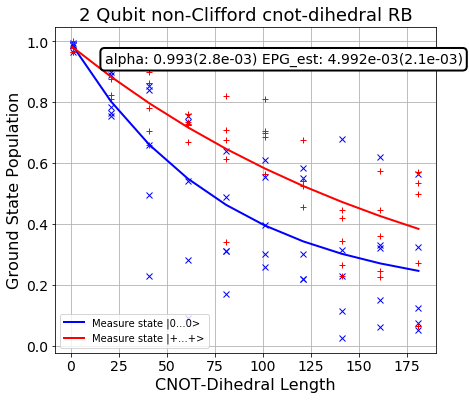

In [22]:
#Plot the joint RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford cnot-dihedral RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()

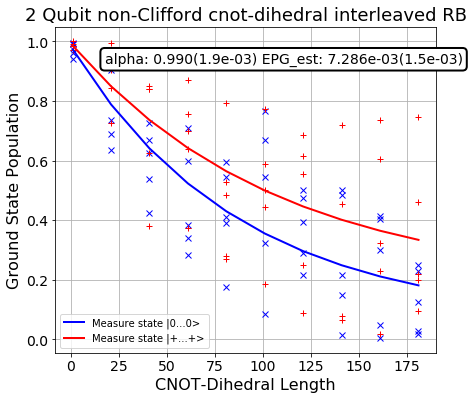

In [23]:
#Plot the joint interleaved RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_int_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford cnot-dihedral interleaved RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()

### Process fidelity of the interleaved CS gate

In [24]:
from qiskit.quantum_info import Choi, PTM, Kraus, SuperOp
from qiskit.quantum_info import state_fidelity, process_fidelity

# Print the unitary of the cs gate
cs_unitary = np.array([[1, 0, 0, 0],
                       [0, 1, 0, 0],
                       [0, 0, 1, 0],
                       [0, 0, 0, 1j]])
#print ('unitary:', cs_unitary)

# Calculate the SuperOp
err_op = SuperOp(Kraus([err_unitary_cs]))
cs_op = SuperOp(Kraus([cs_unitary]))
noise_cs_op = SuperOp(err_op._data @ cs_op._data)

# Calculate the fidelity
process_fidelity = np.real(process_fidelity(cs_op, noise_cs_op, require_cptp=False))
state_fidelity = state_fidelity(Choi(cs_op)._data / 4, Choi(noise_cs_op)._data / 4)

print("state fidelity   = %f, gate error = %f" %(state_fidelity, 1-state_fidelity))
print("process fidelity = %f, gate error = %f" %(state_fidelity, 1-state_fidelity))

state fidelity   = 0.998751, gate error = 0.001249
process fidelity = 0.998751, gate error = 0.001249
